# ANALYSIS OF COMPANY XYZ SUPERMARKET DATA

Company XYZ owns a supermarket chain across the country. Each major branch, located in 3 cities across the country, recorded sales information for 3 months to help understand sales trends and determine its growth due to the rise in supermarket competition.

## Step 1 - Loading the Dataset
In this step, I will combine the data set from each branch into a unified data set for easy analysis. I will write the syntaxes that will read multiple CSV files from my current working directory and export a CSV file to the same directory after combination of the above. 
This helps to automate reading and combining multiple CSV files.
* [Here](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit) is a link to a description of the dataset

#### Import Libraries

In [1]:
from csv import reader
import datetime as dt
import pandas as pd
import os
import glob

#### Use `glob` to match the pattern "csv" and generate a list of the csv files

In [2]:
# Set working directory that contains the dataset and code file
os.chdir("/Users/osala/Downloads/Data-Analysis-Project-main")

extension = 'csv'

company_csv_files = [i for i in glob.glob('*.{}'.format(extension))]
company_csv_files

['Abuja_Branch.csv',
 'CompanyXYZcombined.csv',
 'Lagos_Branch.csv',
 'Port_Harcourt_Branch.csv']

**Examine the files using `reader` imported above**

In [3]:
# Define a function to examine the csv files
def examine_csv_files(csv_files, rows_and_columns=True):
    for file in csv_files:
        opened_file = open(file)
        read_file = reader(opened_file)
        csv_data = list(read_file)
        csv_header = csv_data[0]
        csv_data = csv_data[1:]
    
        if rows_and_columns:
            print(csv_header, '\n')
            print('*Number of rows:', len(csv_data))
            print('*Number of columns:', len(csv_header), '\n')
    
examine_csv_files(company_csv_files)


['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 

*Number of rows: 332
*Number of columns: 17 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 

*Number of rows: 1000
*Number of columns: 17 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 

*Number of rows: 340
*Number of columns: 17 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 

*Number of rows: 

* The output above confirms identical header names and number of columns across the files

#### Combine all the files in the generated list above and export to a CSV


In [4]:
# Combine the list of Dataframe objects after conversion from .csv files using 'pd.read_csv' method
company_xyz_concat = pd.concat([pd.read_csv(f) for f in company_csv_files])


# Export to csv
company_xyz_concat.to_csv("CompanyXYZcombined.csv", index=False)

#### Read the combined CSV file using `pd.read_csv` method

In [5]:
company_xyz_concat = pd.read_csv('CompanyXYZcombined.csv')

## Step 2 - Data Exploration
In this step, I will explore the loaded dataset using some built-in Pandas functions. I will write code that present general info about the data including the possibility of identifying missing data thereof.

### Import more Libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### Use the `.head()` method to view the first few rows of the dataset

In [7]:
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### Check the number of rows and columns present in the data using the shape attribute.

In [8]:
company_xyz_concat.shape

# Output means 1,000 rows and 17 columns

(2000, 17)

#### Generate the names of the columns using the `columns` attribute.

In [9]:
company_xyz_concat.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Statistical Summary
The `describe()` method provides the statistical summary for the dataset.

In [10]:
# For numerical data
company_xyz_concat.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2.000000e+03,2000.00000,2000.00000
mean,20041.966800,5.510000,5536.57284,116268.029640,110731.456800,4.761905e+00,5536.57284,6.97270
std,9535.680197,2.922699,4214.12272,88496.577116,84282.454396,5.375007e-14,4214.12272,1.71815
min,3628.800000,1.000000,183.06000,3844.260000,3661.200000,4.761905e+00,183.06000,4.00000
25%,11835.000000,3.000000,2132.95500,44792.055000,42659.100000,4.761905e+00,2132.95500,5.50000
50%,19882.800000,5.000000,4351.68000,91385.280000,87033.600000,4.761905e+00,4351.68000,7.00000
75%,28056.600000,8.000000,8080.29000,169686.090000,161605.800000,4.761905e+00,8080.29000,8.50000
max,35985.600000,10.000000,17874.00000,375354.000000,357480.000000,4.761905e+00,17874.00000,10.00000


##### Notes
* In the output above, we see that all columns containing numerical data have the same count of 1,000. This indicates that there are no rows with missing values
* The minimum, maximum, mean as well as percentile values for each numerical column are also given

In [11]:
# For categorical data
company_xyz_concat.describe(include=['O'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,1000,3,3,2,2,6,89,506,3
top,610-46-4100,A,Lagos,Member,Female,Fashion accessories,2/7/2019,19:48,Epay
freq,2,680,680,1002,1002,356,40,14,690


##### Notes
* The same count of 1,000 is also seen for all the columns here.
* The `Invoice ID` column contains unique values for each entry
* **Fashion accessories** were the most patronized products and **Epay** was the most used payment channel

#### Looking for missing values
The `isnull()`, and `notna()` methods provide a quick overview of the missing data occurence. Calling the `.sum()` method immediately after the previously mentioned methods outputs a count of the Boolean values.

In [12]:
# Shows the count of missing data
company_xyz_concat.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
#company_xyz_concat.notnull().sum()
# OR the code below

# Shows the count of data present
company_xyz_concat.notna().sum()

Invoice ID                 2000
Branch                     2000
City                       2000
Customer type              2000
Gender                     2000
Product line               2000
Unit price                 2000
Quantity                   2000
Tax 5%                     2000
Total                      2000
Date                       2000
Time                       2000
Payment                    2000
cogs                       2000
gross margin percentage    2000
gross income               2000
Rating                     2000
dtype: int64

#### Data Information
The `info()`method also outputs a summary of a DataFrame including information about the index, column data types, non-null values and memory usage.

In [14]:
company_xyz_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               2000 non-null   object 
 1   Branch                   2000 non-null   object 
 2   City                     2000 non-null   object 
 3   Customer type            2000 non-null   object 
 4   Gender                   2000 non-null   object 
 5   Product line             2000 non-null   object 
 6   Unit price               2000 non-null   float64
 7   Quantity                 2000 non-null   int64  
 8   Tax 5%                   2000 non-null   float64
 9   Total                    2000 non-null   float64
 10  Date                     2000 non-null   object 
 11  Time                     2000 non-null   object 
 12  Payment                  2000 non-null   object 
 13  cogs                     2000 non-null   float64
 14  gross margin percentage 

## Step 3 - Dealing with DateTime Features

From the summary above, the `Date` and `Time` columns are not in the appropriate data type.
I will convert these columns to the appropriate `datetime` datatype using the `pd.to_datetime()` method and then use the `dtypes` attribute to confirm the data type change.
* The expected output after changing the data type and calling `.dtypes` is '<M8[ns]'

In [15]:
company_xyz_concat['Date'] = pd.to_datetime(company_xyz_concat['Date'])
company_xyz_concat['Date'].dtypes

dtype('<M8[ns]')

#### Repeat the steps above to the `time` column

In [16]:
company_xyz_concat['Time'] = pd.to_datetime(company_xyz_concat['Time'])
company_xyz_concat['Time'].dtypes

dtype('<M8[ns]')

### Extract features from the `Date` & `Time` columns

#### Extract day from the `Date` column and save to a new `Day` column using `dt.day`

In [17]:
company_xyz_concat['Day'] = company_xyz_concat['Date'].dt.day

#### Extract month from the `Date` column and save to a new `Month` column using `dt.month`

In [18]:
company_xyz_concat['Month'] = company_xyz_concat['Date'].dt.month

#### Extract year from the `Date` column and save to a new `Year` column using `dt.year` 

In [19]:
company_xyz_concat['Year'] = company_xyz_concat['Date'].dt.year

#### Extract hour from the `Time` column and save to a new `Hour` column using `dt.hour`
* View the first few rows of `company_xyz_concat` data after this.

In [20]:
company_xyz_concat['Hour'] = company_xyz_concat['Time'].dt.hour
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-06-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-06-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-06-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-06-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-06-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas uses the `nunique()` method to get a count of unique values, while the `unique()` method gets unique values of a Series object.

##### From the `Hour` column, determine the number of unique hours of sales in the supermarket, and return an array of the hours using the `unique()` method

In [21]:
company_xyz_concat['Hour'].nunique()

11

In [22]:
company_xyz_concat['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

- Get a list of categorical columns in the dataset by iterating through the columns and checking if the data in each column is an object datatype. The resulting list is assigned to the `categorical_columns` variable.

In [23]:
categorical_columns = [col for col in company_xyz_concat.columns if company_xyz_concat[col].dtype == 'object']
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### Generate unique values from data in the categorical columns

In [24]:
for category in categorical_columns:
    unique_values = company_xyz_concat[category].unique().tolist()
    if category == 'Invoice ID':  # This column contains unique values for each row
        continue
    print("Total Number of unique values in the {} Column: {}"
          .format(category, len(company_xyz_concat[category].unique().tolist())))
    print(unique_values, '\n')

Total Number of unique values in the Branch Column: 3
['B', 'A', 'C'] 

Total Number of unique values in the City Column: 3
['Abuja', 'Lagos', 'Port Harcourt'] 

Total Number of unique values in the Customer type Column: 2
['Member', 'Normal'] 

Total Number of unique values in the Gender Column: 2
['Female', 'Male'] 

Total Number of unique values in the Product line Column: 6
['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty'] 

Total Number of unique values in the Payment Column: 3
['Card', 'Epay', 'Cash'] 



#### The `value_counts()` function is used to get a Series containing counts of unique values.  Apply this method to the columns in `categorical columns`

In [25]:
for category in categorical_columns:
    if category == 'Invoice ID':
        continue
    print(company_xyz_concat[category].value_counts(), '\n')

A    680
B    664
C    656
Name: Branch, dtype: int64 

Lagos            680
Abuja            664
Port Harcourt    656
Name: City, dtype: int64 

Member    1002
Normal     998
Name: Customer type, dtype: int64 

Female    1002
Male       998
Name: Gender, dtype: int64 

Fashion accessories       356
Food and beverages        348
Electronic accessories    340
Sports and travel         332
Home and lifestyle        320
Health and beauty         304
Name: Product line, dtype: int64 

Epay    690
Cash    688
Card    622
Name: Payment, dtype: int64 



## Step 5 - Aggregration with GroupBy

#### Create a groupby object with the `City` column, and apply the aggregation functions; sum and mean. 

In [26]:
cities = company_xyz_concat.groupby(['City'])

cities.sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,13304793.6,3640,3641063.04,76462323.84,72821260.8,3161.904762,3641063.04,4527.2,10136,1330,1340616,10058
Lagos,13410352.8,3718,3641155.56,76464266.76,72823111.2,3238.095238,3641155.56,4778.4,10464,1376,1372920,9974
Port Harcourt,13368787.2,3662,3790927.08,79609468.68,75818541.6,3123.809524,3790927.08,4639.8,9912,1280,1324464,9788


In [27]:
cities.mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


#### Display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [28]:
cities['gross income'].sum()

City
Abuja            3641063.04
Lagos            3641155.56
Port Harcourt    3790927.08
Name: gross income, dtype: float64

In [29]:
print('The city with the highest gross income is {} with total gross income of {:.2f}'.format(
      cities['gross income'].sum().idxmax(), cities['gross income'].sum().max()))

The city with the highest gross income is Port Harcourt with total gross income of 3790927.08


In [30]:
# Exploring other columns; 
cities.agg({'Unit price': ['sum', 'mean', 'min', 'max'], 'Quantity': ['sum', 'mean', 'min', 'max'],
            'Rating': ['sum', 'mean', 'min', 'max']})

Unit price                                Quantity            \
                      sum          mean     min      max      sum      mean   
City                                                                          
Abuja          13304793.6  20037.339759  3812.4  35985.6     3640  5.481928   
Lagos          13410352.8  19721.107059  3628.8  35938.8     3718  5.467647   
Port Harcourt  13368787.2  20379.248780  3657.6  35985.6     3662  5.582317   

                       Rating                       
              min max     sum      mean  min   max  
City                                                
Abuja           1  10  4527.2  6.818072  4.0  10.0  
Lagos           1  10  4778.4  7.027059  4.0  10.0  
Port Harcourt   1  10  4639.8  7.072866  4.0  10.0

* The Port Harcourt branch has the highest mean unit price, quantity and rating

## Step 6 - Data Visualization

The `Seaborn visualization` library will be used

#### Use `countplot` to determine the branch with the highest sales record.

Text(0, 0.5, 'No of sales')

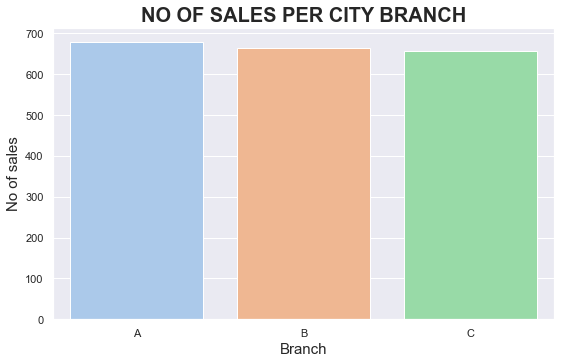

In [31]:
dark_grid_style = sns.set_theme(style="darkgrid")

plt.figure(figsize = (8,5))
city_order = ['A', 'B', 'C']
sales_rec = sns.countplot(x = 'Branch', data=company_xyz_concat, order=city_order, palette='pastel')
sales_rec.set_title('NO OF SALES PER CITY BRANCH', fontsize=20, fontweight='bold')
sales_rec.set_xlabel('Branch', fontsize=15)
sales_rec.set_ylabel('No of sales', fontsize=15)

#### Explore a countplot for the `Payment` and `City` columns

Text(0, 0.5, 'No of payments')

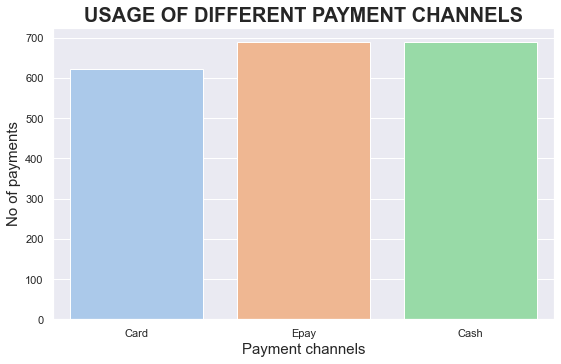

In [32]:
plt.figure(figsize = (8,5))
payments = sns.countplot(x = 'Payment', data=company_xyz_concat, palette='pastel')
payments.set_title('USAGE OF DIFFERENT PAYMENT CHANNELS', fontsize=20, fontweight='bold')
payments.set_xlabel('Payment channels', fontsize=15)
payments.set_ylabel('No of payments', fontsize=15)

Text(0, 0.5, 'No of sales')

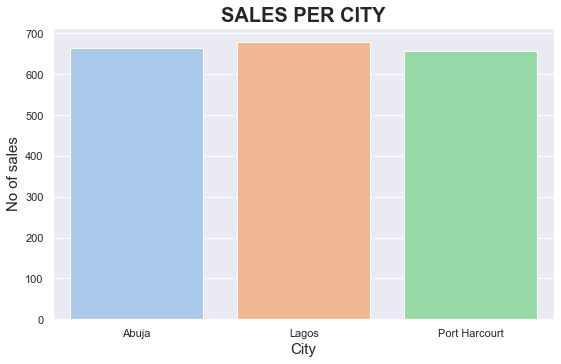

In [33]:
plt.figure(figsize = (8,5))
city_rec = sns.countplot(x = 'City', data=company_xyz_concat, palette='pastel')
city_rec.set_title('SALES PER CITY', fontsize = 20, fontweight='bold')
city_rec.set_xlabel('City', fontsize=15)
city_rec.set_ylabel('No of sales', fontsize=15)

#### Determine the highest & lowest sold product line using `countplot` 
Set the `Product line` column to the y-axis to prevent congestion on the x-axis

Text(0, 0.5, 'Product Categories')

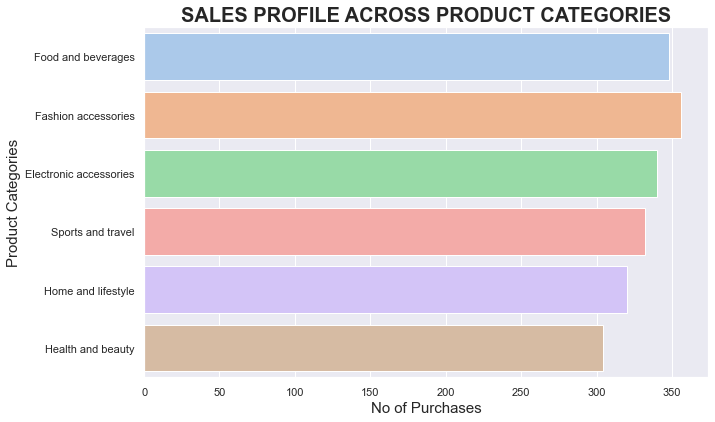

In [34]:
plt.figure(figsize = (9,6))
product_cat = sns.countplot(y = 'Product line', data=company_xyz_concat, palette='pastel')
product_cat.set_title('SALES PROFILE ACROSS PRODUCT CATEGORIES', fontsize=20, fontweight='bold')
product_cat.set_xlabel('No of Purchases', fontsize=15)
product_cat.set_ylabel('Product Categories', fontsize=15)

#### Determine the Payment channel used by most customers to pay for each product line.

Text(0, 0.5, 'Product Categories')

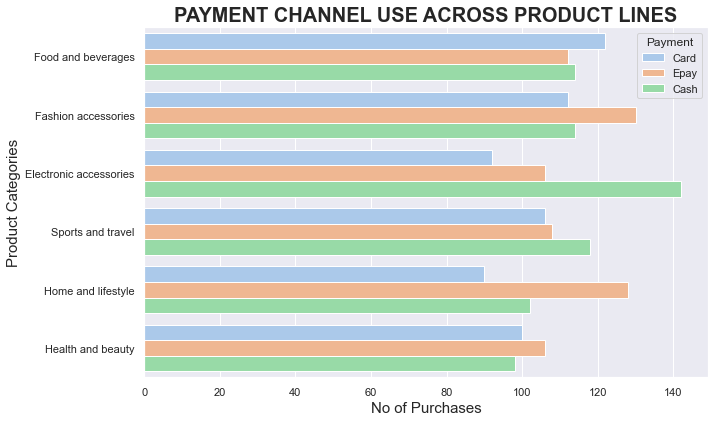

In [35]:
plt.figure(figsize = (9,6))
product_cat_payment = sns.countplot(y = 'Product line', data=company_xyz_concat, hue='Payment', palette='pastel')
product_cat_payment.set_title('PAYMENT CHANNEL USE ACROSS PRODUCT LINES', fontsize=20, fontweight='bold')
product_cat_payment.set_xlabel('No of Purchases', fontsize=15)
product_cat_payment.set_ylabel('Product Categories', fontsize=15)

##### Notes
* There's a striking preference for cash payment in the electronic accessories category.
* Fashion accessories and home and lifestyle categories also show relative customer preference for payment using Epay

#### Determine payment channel use for each branch.

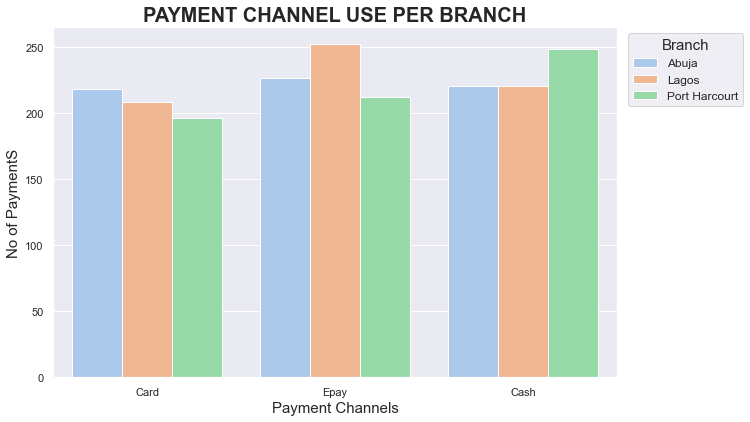

In [36]:
plt.figure(figsize = (9,6))
payment_branch = sns.countplot(x = 'Payment', data=company_xyz_concat, hue='City', palette='pastel')
payment_branch.set_title('PAYMENT CHANNEL USE PER BRANCH', fontsize=20, fontweight='bold')
payment_branch.set_xlabel('Payment Channels', fontsize=15)
payment_branch.set_ylabel('No of PaymentS', fontsize=15)
payment_branch.legend(fontsize=12,
               bbox_to_anchor=(1.01, 1),
               title="Branch",
               title_fontsize=15);

* There's a relative preference for Epay at the Lagos branch but cash at the Port Harcourt branch

#### Determine the branch with the lowest rating.

Text(0, 0.5, 'Ratings')

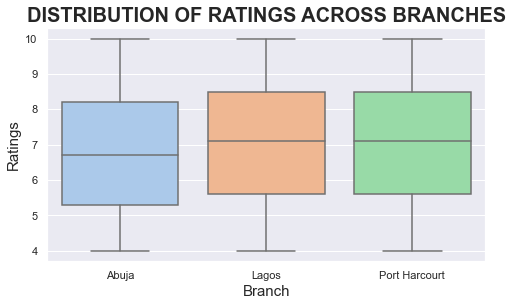

In [37]:
plt.figure(figsize = (7,4))
branch_rating = sns.boxplot(x="City", y="Rating", data=company_xyz_concat, palette='pastel')
branch_rating.set_title('DISTRIBUTION OF RATINGS ACROSS BRANCHES', fontsize=20, fontweight='bold')
branch_rating.set_xlabel('Branch', fontsize = 15)
branch_rating.set_ylabel('Ratings', fontsize = 15)

The lowest rating of 4 is common to all the branches

#### Gender often affects the kind of products being purchased at the supermarket. 
* Use `catplot()` to generate visualization with `Product line` on the x-axis, `Quantity` on the y-axis, and `Gender` as hue.
<br/>
* Plot the same as above using `Total Column` on the y-axis.

Text(0.5, 1.0, 'QUANTITY PURCHASED ACROSS GENDER FOR DIFFERENT PRODUCT LINES')

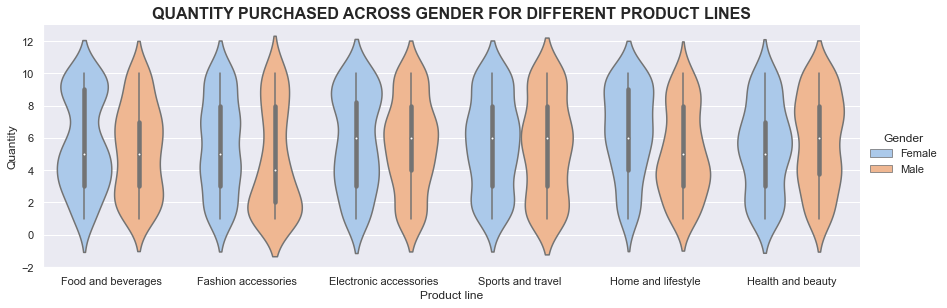

In [38]:
pqg = sns.catplot(x="Product line", y="Quantity", hue='Gender', kind='violin', aspect=3, height=4, 
                  palette='pastel',
                  data=company_xyz_concat)
plt.title('QUANTITY PURCHASED ACROSS GENDER FOR DIFFERENT PRODUCT LINES', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'TOTAL PRICE DISTRIBUTION ACROSS PRODUCT CATEGORY AND GENDER')

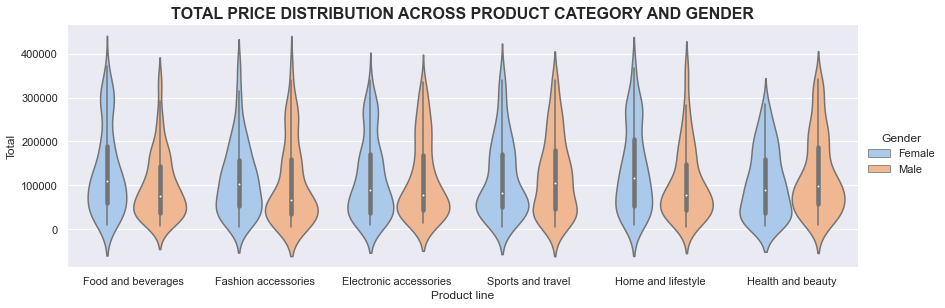

In [39]:
ptg = sns.catplot(x="Product line", y="Total", hue='Gender', kind='violin', aspect=3, height=4, 
                  palette='pastel', data=company_xyz_concat)
plt.title('TOTAL PRICE DISTRIBUTION ACROSS PRODUCT CATEGORY AND GENDER', fontsize=16, fontweight='bold')

##### Notes
* Females buy and spend relatively more on food & beverages as well as home & lifestyle products while males spend relatively more on health & beauty products.
* Majority of shoppers spend 100,000 or less.

#### Using `catplot()`, plot `Product line` per `Unit price`, and `Product line` per `Quantity` while setting the kind parameter to `point` 

Text(0.5, 1.0, 'AVERAGE UNIT PRICE ACROSS PRODUCTS')

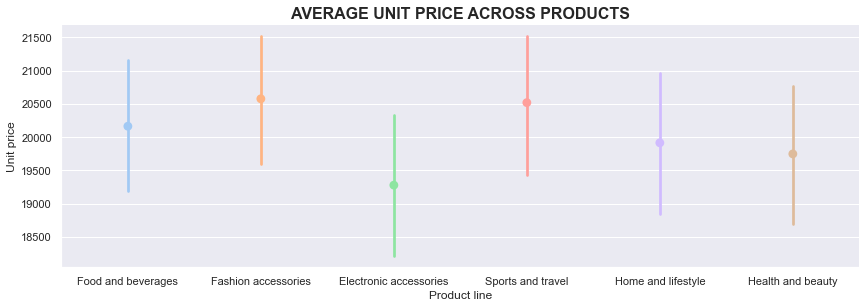

In [40]:

p_up = sns.catplot(x="Product line", y="Unit price", kind='point', aspect=3, height=4, palette='pastel',
                  data=company_xyz_concat)
plt.title('AVERAGE UNIT PRICE ACROSS PRODUCTS', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'AVERAGE QUANTITY PURCHASED ACROSS PRODUCT LINES')

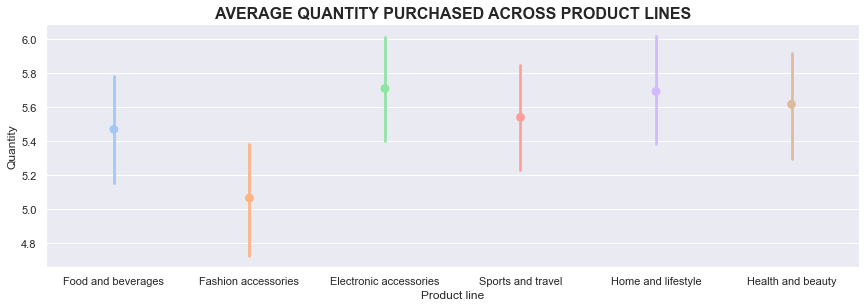

In [41]:
pq = sns.catplot(x="Product line", y="Quantity", kind='point', aspect=3, height=4, palette='pastel',
                  data=company_xyz_concat)
plt.title('AVERAGE QUANTITY PURCHASED ACROSS PRODUCT LINES', fontsize=16, fontweight='bold')

* Product categories with the lowest unit price were on average purchased more; an example is the electronic accessories product line.

## Step 7 - StandOut Section



#### Is the quantity of goods bought affected by customer type?

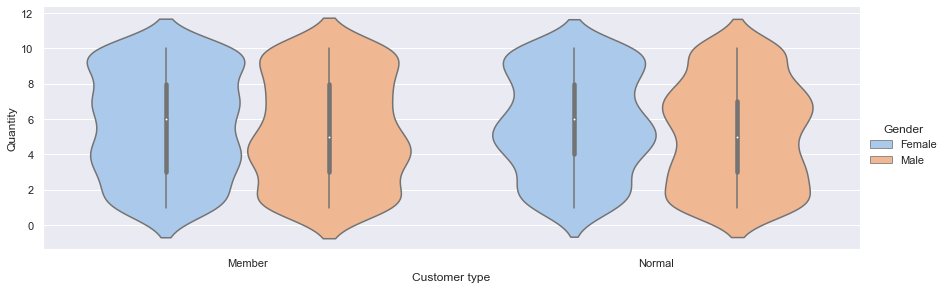

In [42]:
pqg = sns.catplot(x="Customer type", y="Quantity", kind='violin', hue='Gender', aspect=3, height=4, 
                  palette='pastel',
                  data=company_xyz_concat)

No significant affectation

#### Does the payment channel used affect the quantity of goods bought and is there a difference across gender?

Text(0.5, 1.0, 'DIFFERENCES IN GENDER AND QUANTITIES BOUGHT ACROSS PAYMENT CHANNELS')

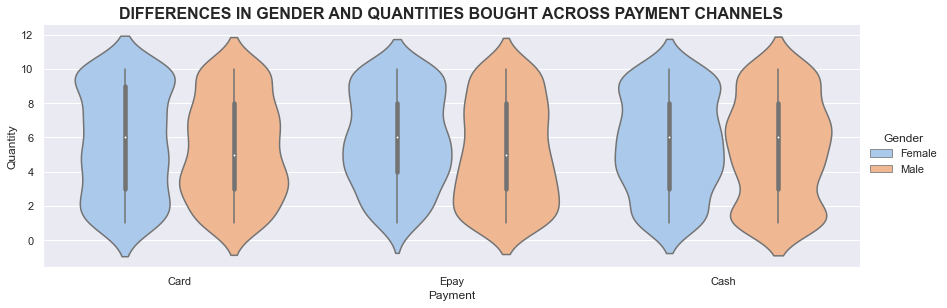

In [43]:
pqg = sns.catplot(x="Payment", y="Quantity", kind='violin', hue='Gender', aspect=3, height=4, 
                  palette='pastel',
                  data=company_xyz_concat)
plt.title('DIFFERENCES IN GENDER AND QUANTITIES BOUGHT ACROSS PAYMENT CHANNELS', fontsize=16, fontweight='bold')

Similar quantities are seen across gender and payment channel

#### Are there unique hours when most of the transactions occur?

Text(0, 0.5, 'Transactions')

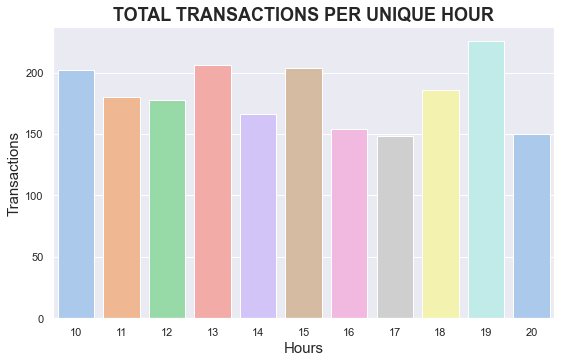

In [44]:
plt.figure(figsize = (8,5))
hour = sns.countplot(x = 'Hour', data=company_xyz_concat, palette='pastel')
hour.set_title('TOTAL TRANSACTIONS PER UNIQUE HOUR', fontsize=18, fontweight='bold')
hour.set_xlabel('Hours', fontsize=15)
hour.set_ylabel('Transactions', fontsize=15)

There's no unique hour. However, the 19th hour has the most accumulated no of transactions suggesting that relatively more customers target this time period just before the supermarket closing time

#### Is there a marked variation in the number of transactions per month?

Text(0, 0.5, 'Count')

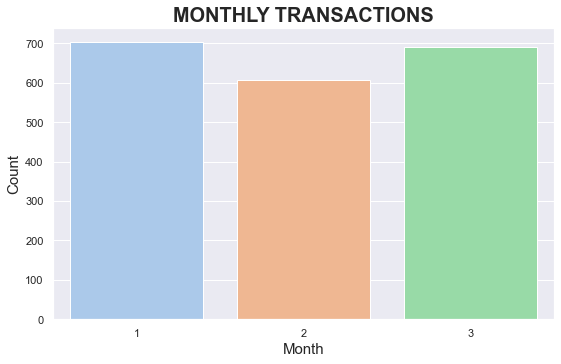

In [45]:
plt.figure(figsize = (8,5))
hour = sns.countplot(x = 'Month', data=company_xyz_concat, palette='pastel')
hour.set_title('MONTHLY TRANSACTIONS', fontsize=20, fontweight='bold')
hour.set_xlabel('Month', fontsize=15)
hour.set_ylabel('Count', fontsize=15)

No significant variation